In [ ]:
#Extracting the zipfile in google drive
#import zipfile
from google.colab import drive

drive.mount('/content/drive/')

#zip_ref = zipfile.ZipFile("/content/drive/My Drive/audio.zip", 'r')
#zip_ref.extractall("/tmp")
#zip_ref.close()dd


Mounted at /content/drive/


In [ ]:
import sys
sys.path.insert(0, '/tmp/')
sys.path.insert(0,'/content/drive/MyDrive/')
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
#from audio_classifier import AudioClassifier
from tensorflow.keras.utils import to_categorical


In [ ]:
train=np.load("/content/drive/MyDrive/X_train.npz")
test=np.load("/content/drive/MyDrive/X_test.npz")
val=np.load("/content/drive/MyDrive/X_val.npz")

X_train=train['x']
y_train=to_categorical(train['y'])
X_test=test['x']
y_test=to_categorical(test['y'])
X_val=val['x']
y_val=to_categorical(val['y'])

In [ ]:
X_train.shape

(5588, 64, 688, 2)

In [ ]:
y_train.shape

(5588, 10)

In [ ]:
X_val.shape

(1397, 64, 688, 2)

In [ ]:
X_test.shape

(1747, 64, 688, 2)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs=keras.Input(shape=(64,688,2))

x = layers.Conv2D(filters=8, kernel_size=(3,3), activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(rate=0.3)(x)

x = layers.Conv2D(filters=16, kernel_size=(3,3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(rate=0.3)(x)

x = layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(rate=0.3)(x)

x = layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(rate=0.3)(x)

x = layers.Flatten()(x)

x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(rate=0.3)(x)

x = layers.Dense(32, activation="relu")(x)

x=layers.Dense(16, activation="relu")(x)

outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 688, 2)]      0         
                                                                 
 conv2d_12 (Conv2D)          (None, 62, 686, 8)        152       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 343, 8)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 31, 343, 8)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 341, 16)       1168      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 170, 16)      0         
 g2D)                                                      

In [ ]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history=model.fit(X_train, y_train, epochs=200, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/200
44/44 [==============================] - 5s 43ms/step - loss: 2.8005 - accuracy: 0.1104 - val_loss: 2.2965 - val_accuracy: 0.1217
Epoch 2/200
44/44 [==============================] - 1s 27ms/step - loss: 2.2834 - accuracy: 0.1178 - val_loss: 2.2899 - val_accuracy: 0.1238
Epoch 3/200
44/44 [==============================] - 1s 26ms/step - loss: 2.2802 - accuracy: 0.1133 - val_loss: 2.2853 - val_accuracy: 0.1210
Epoch 4/200
44/44 [==============================] - 1s 27ms/step - loss: 2.2715 - accuracy: 0.1238 - val_loss: 2.2813 - val_accuracy: 0.1489
Epoch 5/200
44/44 [==============================] - 1s 27ms/step - loss: 2.2639 - accuracy: 0.1115 - val_loss: 2.2754 - val_accuracy: 0.1417
Epoch 6/200
44/44 [==============================] - 1s 27ms/step - loss: 2.2448 - accuracy: 0.1167 - val_loss: 2.2571 - val_accuracy: 0.1417
Epoch 7/200
44/44 [==============================] - 1s 26ms/step - loss: 2.2072 - accuracy: 0.1541 - val_loss: 2.2031 - val_accuracy: 0.2176
Epoch 

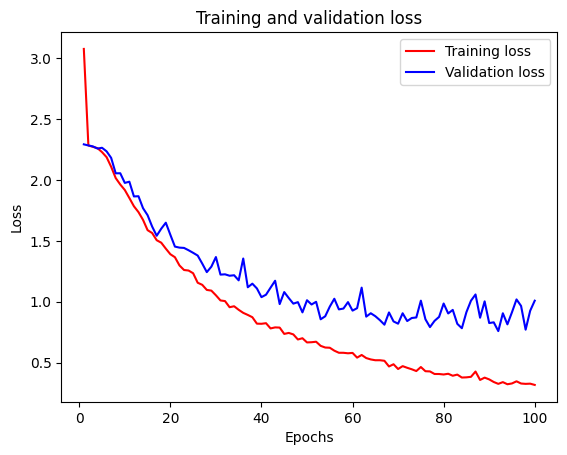

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

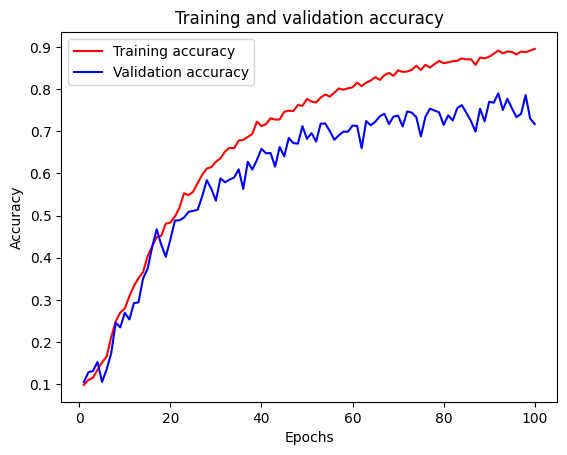

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "r", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#New efficient processing scheme

In [ ]:
#Extracting the zipfile in google drive
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/My Drive/audio.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()


Mounted at /content/drive/


In [ ]:
import sys
sys.path.insert(0, '/tmp/')
sys.path.insert(0,'/content/drive/MyDrive/')
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
#from audio_classifier import AudioClassifier
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import DenseNet121
import tensorflow
print("Tensorflow-version:", tensorflow.__version__)
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from denseNet_audio_trans import denseNetAudioTransform
#from audio_classifier import AudioClassifier
from audio_utils import AudioUtil
from numpy import savez_compressed
from numpy import load

Tensorflow-version: 2.12.0


In [ ]:
#read path csv
df=pd.read_csv("/tmp/relativepaths.csv")
X=df['relative_path']
y=df["classID"]
#split train\test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y,test_size=0.2, random_state=1)
#split train\val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True,test_size=0.2, random_state=1)


In [ ]:
atrans=denseNetAudioTransform(df=df, data_path="/tmp/audio/")

In [ ]:
def audio_transform(idx):
  idx=idx.numpy()
  return atrans[idx]

def sgram_reshape(sgram, label):
  sgram=sgram.numpy()
  sgram_new=np.moveaxis(sgram,0,-1)
  return sgram_new, label

def _fixup_shape(x, y):
    x.set_shape([None, 128, 400, 3]) # n, h, w, c
    y.set_shape([None, 10]) # n, nb_classes
    return x, y

In [ ]:
#train dataset
train_dataset=tensorflow.data.Dataset.from_tensor_slices((X_train.index))
train_dataset=train_dataset.map(lambda i: tensorflow.py_function(func=audio_transform,
                                                                 inp=[i],
                                                                 Tout=[tensorflow.float64, tensorflow.float64]),
                                num_parallel_calls=tensorflow.data.AUTOTUNE)
train_dataset=train_dataset.map(lambda sgram, label: tensorflow.py_function(func=sgram_reshape,
                                                                 inp=[sgram, label],
                                                                 Tout=[tensorflow.float64, tensorflow.float64]),
                                num_parallel_calls=tensorflow.data.AUTOTUNE)
print(train_dataset)
train_dataset=train_dataset.cache()
train_dataset=train_dataset.shuffle(len(train_dataset))
train_dataset=train_dataset.batch(32)
print(train_dataset)
train_dataset=train_dataset.map(_fixup_shape)
print(train_dataset)
train_dataset=train_dataset.prefetch(tensorflow.data.AUTOTUNE)
print(train_dataset)
print(len(train_dataset))

<_ParallelMapDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float64, name=None), TensorSpec(shape=<unknown>, dtype=tf.float64, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float64, name=None), TensorSpec(shape=<unknown>, dtype=tf.float64, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 400, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 400, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float64, name=None))>
175


In [ ]:
val_dataset=tensorflow.data.Dataset.from_tensor_slices((X_val.index))
val_dataset=val_dataset.map(lambda i: tensorflow.py_function(func=audio_transform,
                                                                 inp=[i],
                                                                 Tout=[tensorflow.float64, tensorflow.float64]),
                                num_parallel_calls=tensorflow.data.AUTOTUNE)
val_dataset=val_dataset.map(lambda sgram, label: tensorflow.py_function(func=sgram_reshape,
                                                                 inp=[sgram, label],
                                                                 Tout=[tensorflow.float64, tensorflow.float64]),
                                num_parallel_calls=tensorflow.data.AUTOTUNE)

val_dataset=val_dataset.cache()
val_dataset=val_dataset.batch(32)
val_dataset=val_dataset.map(_fixup_shape)
val_dataset=val_dataset.prefetch(tensorflow.data.AUTOTUNE)
print(val_dataset)
print(len(val_dataset))

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 400, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float64, name=None))>
44


In [ ]:
test_dataset=tensorflow.data.Dataset.from_tensor_slices((X_test.index))
test_dataset=test_dataset.map(lambda i: tensorflow.py_function(func=audio_transform,
                                                                 inp=[i],
                                                                 Tout=[tensorflow.float64, tensorflow.float64]),
                                num_parallel_calls=tensorflow.data.AUTOTUNE)
test_dataset=test_dataset.map(lambda sgram, label: tensorflow.py_function(func=sgram_reshape,
                                                                 inp=[sgram, label],
                                                                 Tout=[tensorflow.float64, tensorflow.float64]),
                                num_parallel_calls=tensorflow.data.AUTOTUNE)

test_dataset=test_dataset.cache()
test_dataset=test_dataset.batch(32)
test_dataset=test_dataset.map(_fixup_shape)
test_dataset=test_dataset.prefetch(tensorflow.data.AUTOTUNE)
print(test_dataset)
print(len(test_dataset))

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 400, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float64, name=None))>
55


In [ ]:
for spec,label in val_dataset:
  print(spec.shape)
  print(label)
  break

(32, 128, 400, 3)
tf.Tensor(
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs=keras.Input(shape=(128,400,3))

x = layers.Conv2D(filters=8, kernel_size=(3,3), activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(rate=0.3)(x)

x = layers.Conv2D(filters=16, kernel_size=(3,3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(rate=0.3)(x)

x = layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(rate=0.3)(x)

x = layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(rate=0.3)(x)

x = layers.Flatten()(x)

x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(rate=0.3)(x)

x = layers.Dense(32, activation="relu")(x)

x=layers.Dense(16, activation="relu")(x)

outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 400, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 126, 398, 8)       224       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 199, 8)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 63, 199, 8)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 197, 16)       1168      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 98, 16)       0         
 g2D)                                                      

In [ ]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
custom_optimizer = tensorflow.optimizers.AdamW(learning_rate=1e-4, weight_decay=1e-3)
model.compile(optimizer=custom_optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history=model.fit(train_dataset, epochs=200, batch_size=32, validation_data=val_dataset)

Epoch 1/200
175/175 [==============================] - 6s 20ms/step - loss: 2.9557 - accuracy: 0.1305 - val_loss: 2.2616 - val_accuracy: 0.1696
Epoch 2/200
175/175 [==============================] - 3s 19ms/step - loss: 2.1588 - accuracy: 0.1747 - val_loss: 2.2017 - val_accuracy: 0.1739
Epoch 3/200
175/175 [==============================] - 3s 19ms/step - loss: 2.0815 - accuracy: 0.2022 - val_loss: 2.2027 - val_accuracy: 0.1374
Epoch 4/200
175/175 [==============================] - 3s 19ms/step - loss: 2.0272 - accuracy: 0.2171 - val_loss: 2.1523 - val_accuracy: 0.1961
Epoch 5/200
175/175 [==============================] - 3s 19ms/step - loss: 1.9825 - accuracy: 0.2436 - val_loss: 2.1042 - val_accuracy: 0.2105
Epoch 6/200
175/175 [==============================] - 3s 19ms/step - loss: 1.9251 - accuracy: 0.2616 - val_loss: 1.9527 - val_accuracy: 0.3178
Epoch 7/200
175/175 [==============================] - 3s 19ms/step - loss: 1.8672 - accuracy: 0.2768 - val_loss: 1.8922 - val_accuracy:

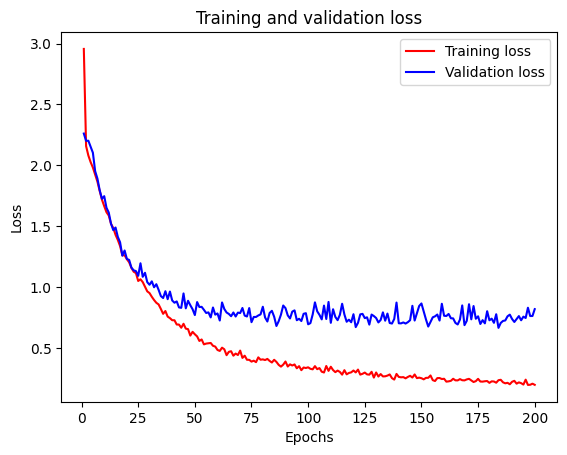

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

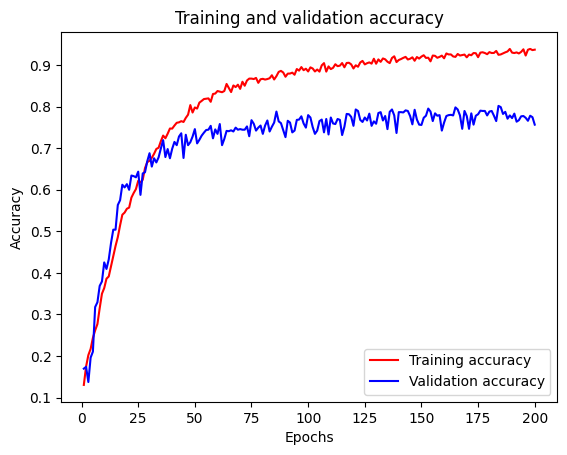

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "r", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Applying the standard 10-fold CV for pre-defined fols of Sound8k dataset

In [ ]:
#Extracting the zipfile in google drive
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/My Drive/audio.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()


Mounted at /content/drive/


In [ ]:
import sys
sys.path.insert(0, '/tmp/')
sys.path.insert(0,'/content/drive/MyDrive/')
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
#from audio_classifier import AudioClassifier
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import DenseNet121
import tensorflow
print("Tensorflow-version:", tensorflow.__version__)
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from denseNet_audio_trans import denseNetAudioTransform
#from audio_classifier import AudioClassifier
from audio_utils import AudioUtil
from numpy import savez_compressed
from numpy import load

Tensorflow-version: 2.12.0


In [ ]:
#read path csv
df=pd.read_csv("/tmp/relativepaths.csv")
X=df['relative_path']
y=df["classID"]

In [ ]:
atrans=denseNetAudioTransform(df=df, data_path="/tmp/audio/")

In [ ]:
def audio_transform(idx):
  idx=idx.numpy()
  return atrans[idx]

def sgram_reshape(sgram, label):
  sgram=sgram.numpy()
  sgram_new=np.moveaxis(sgram,0,-1)
  return sgram_new, label

def _fixup_shape(x, y):
    x.set_shape([None, 128, 400, 3]) # n, h, w, c
    y.set_shape([None, 10]) # n, nb_classes
    return x, y

In [ ]:
#folds dict that has keys with fold names and list(index) as values
folds={}
for path, idx in zip(X,X.index):
    if path.split("/")[1] in folds:
        folds[path.split("/")[1]].append(idx)
    else:
        folds[path.split("/")[1]]=[idx]
folds.keys()

dict_keys(['fold5', 'fold10', 'fold2', 'fold6', 'fold1', 'fold9', 'fold7', 'fold4', 'fold3', 'fold8'])

In [ ]:
acc_per_fold = []
loss_per_fold = []
for fold in folds.keys():
  #creating train and val index sets
  val_idx=folds[fold]
  train_folds=[i for i in list(folds.keys()) if i!=fold]
  train_idx=[]
  for train_fold in train_folds:
    train_idx=train_idx+folds[train_fold]
  #preprocessing------------------------------------------------------------------------------------------------------
  #train dataset
  train_dataset=tensorflow.data.Dataset.from_tensor_slices((train_idx))
  train_dataset=train_dataset.map(lambda i: tensorflow.py_function(func=audio_transform,
                                                                  inp=[i],
                                                                  Tout=[tensorflow.float64, tensorflow.float64]),
                                  num_parallel_calls=tensorflow.data.AUTOTUNE)
  train_dataset=train_dataset.map(lambda sgram, label: tensorflow.py_function(func=sgram_reshape,
                                                                  inp=[sgram, label],
                                                                  Tout=[tensorflow.float64, tensorflow.float64]),
                                  num_parallel_calls=tensorflow.data.AUTOTUNE)
  train_dataset=train_dataset.cache()
  train_dataset=train_dataset.shuffle(len(train_dataset))
  train_dataset=train_dataset.batch(32)
  train_dataset=train_dataset.map(_fixup_shape)
  train_dataset=train_dataset.prefetch(tensorflow.data.AUTOTUNE)
  #val dataset
  val_dataset=tensorflow.data.Dataset.from_tensor_slices((val_idx))
  val_dataset=val_dataset.map(lambda i: tensorflow.py_function(func=audio_transform,
                                                                  inp=[i],
                                                                  Tout=[tensorflow.float64, tensorflow.float64]),
                                  num_parallel_calls=tensorflow.data.AUTOTUNE)
  val_dataset=val_dataset.map(lambda sgram, label: tensorflow.py_function(func=sgram_reshape,
                                                                  inp=[sgram, label],
                                                                  Tout=[tensorflow.float64, tensorflow.float64]),
                                  num_parallel_calls=tensorflow.data.AUTOTUNE)
  val_dataset=val_dataset.cache()
  val_dataset=val_dataset.batch(32)
  val_dataset=val_dataset.map(_fixup_shape)
  val_dataset=val_dataset.prefetch(tensorflow.data.AUTOTUNE)
  #------------------------------------------------------------------------------------------------------------------
  #model architecture------------------------------------------------------------------------------------------------
  inputs=keras.Input(shape=(128,400,3))
  x = layers.Conv2D(filters=8, kernel_size=(3,3), activation="relu")(inputs)
  x = layers.MaxPooling2D(pool_size=(2,2))(x)
  x = layers.Dropout(rate=0.3)(x)
  x = layers.Conv2D(filters=16, kernel_size=(3,3), activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=(2,2))(x)
  x = layers.Dropout(rate=0.3)(x)
  x = layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=(2,2))(x)
  x = layers.Dropout(rate=0.3)(x)
  x = layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=(2,2))(x)
  x = layers.Dropout(rate=0.3)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(64, activation="relu")(x)
  x = layers.Dropout(rate=0.3)(x)
  x = layers.Dense(32, activation="relu")(x)
  x=layers.Dense(16, activation="relu")(x)
  outputs = layers.Dense(10, activation="softmax")(x)
  model = keras.Model(inputs=inputs, outputs=outputs)
  #-----------------------------------------------------------------------------------------------------------------
  #compile and fit
  model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=["accuracy"])
  history=model.fit(train_dataset, epochs=200, batch_size=32, verbose=0)
  #evaluate
  # Generate generalization metrics
  scores = model.evaluate(val_dataset, verbose=0)
  print(f'Score for {fold}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

#Provide average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Score for fold5: loss of 1.4895256757736206; accuracy of 61.538463830947876%
Score for fold10: loss of 1.070419430732727; accuracy of 71.9235360622406%
Score for fold2: loss of 1.7419747114181519; accuracy of 60.2477490901947%
Score for fold6: loss of 1.4716213941574097; accuracy of 67.5577163696289%
Score for fold1: loss of 1.5924386978149414; accuracy of 61.741119623184204%
Score for fold9: loss of 1.445380449295044; accuracy of 66.78921580314636%
Score for fold7: loss of 1.792728304862976; accuracy of 63.24582099914551%
Score for fold4: loss of 1.524362564086914; accuracy of 61.91919445991516%
Score for fold3: loss of 1.9896132946014404; accuracy of 53.72973084449768%
Score for fold8: loss of 2.257711887359619; accuracy of 56.32754564285278%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 1.4895256757736206 - Accuracy: 61.538463830947876%
----------------